<a href="https://colab.research.google.com/github/wepeng07/ML/blob/main/homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering


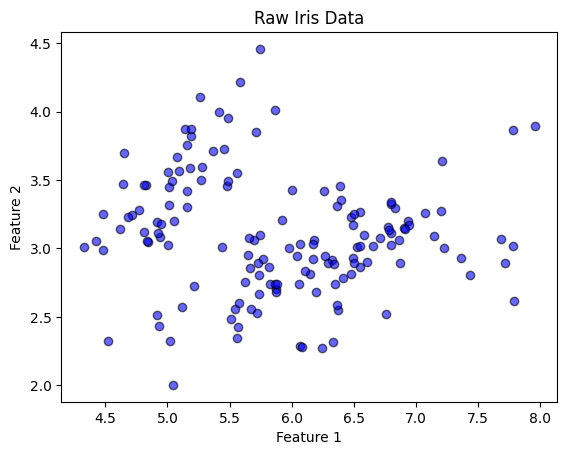

In [2]:
iris_data = np.genfromtxt("data/iris.txt", usecols=(0,1))
plt.scatter(iris_data[:, 0], iris_data[:, 1], c='blue', alpha=0.6, edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Raw Iris Data")
plt.show()

i think there are three clusters exist in the image


Results for K-Means with k=2:
Initialization 1: Inertia = 57.87764839698303


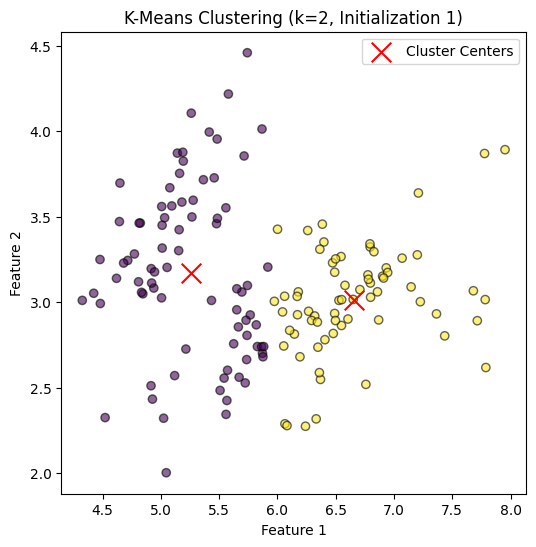

Initialization 2: Inertia = 57.87966196118195


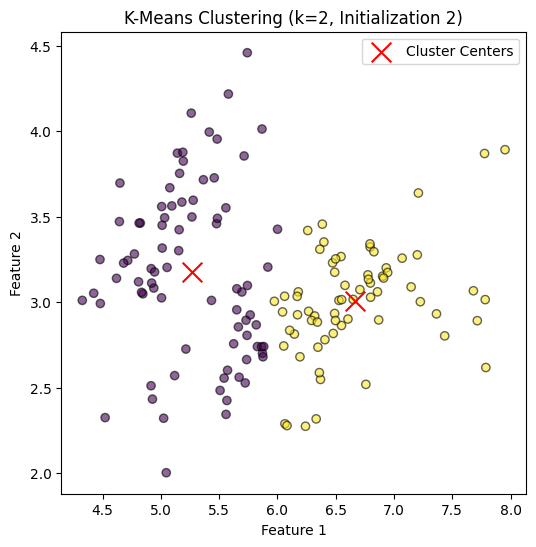

Initialization 3: Inertia = 57.87764839698303


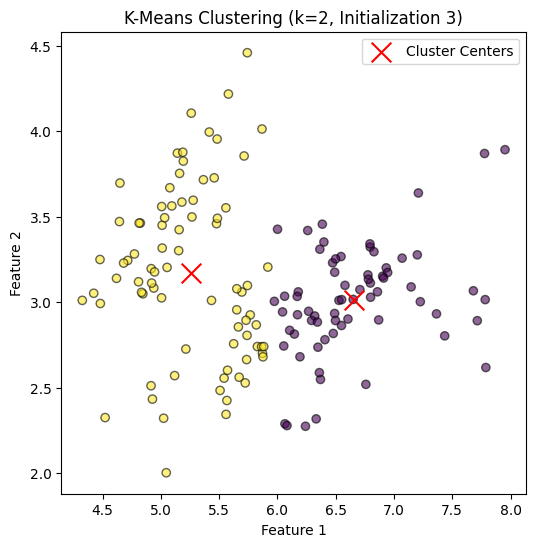

Initialization 4: Inertia = 57.87966196118195


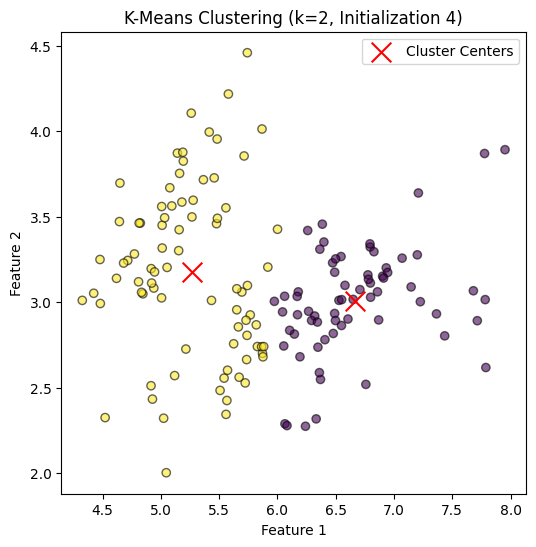

Initialization 5: Inertia = 57.87764839698303


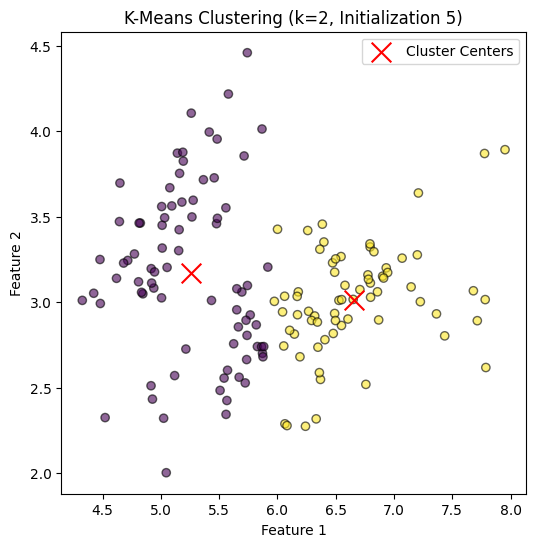

Best Inertia for k=2: 57.87764839698303



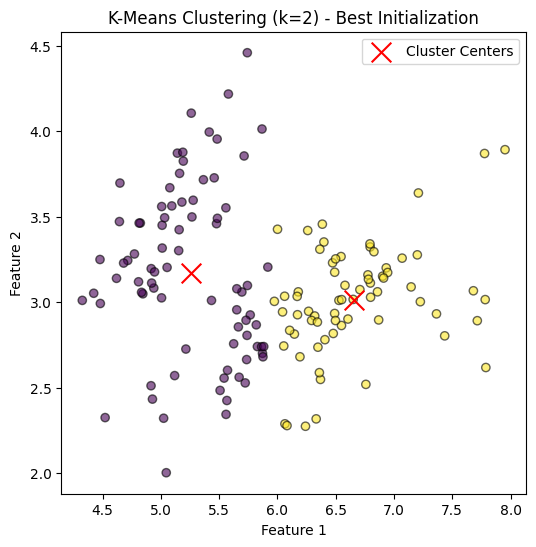


Results for K-Means with k=5:
Initialization 1: Inertia = 20.906080308386684


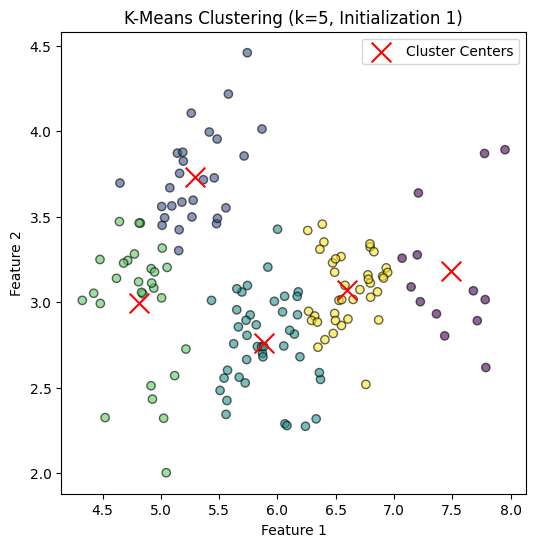

Initialization 2: Inertia = 23.438643757297644


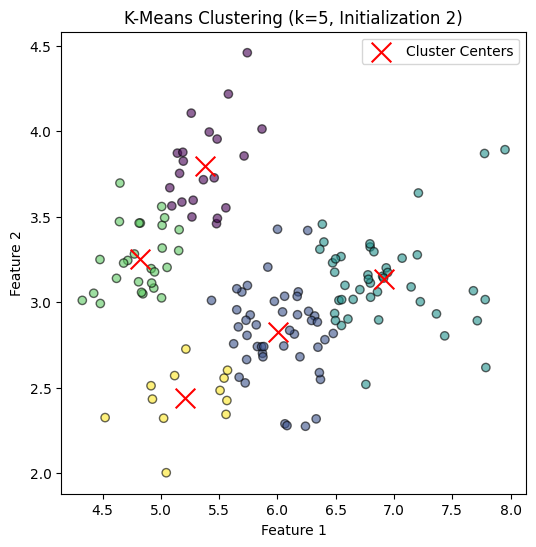

Initialization 3: Inertia = 21.04328380546553


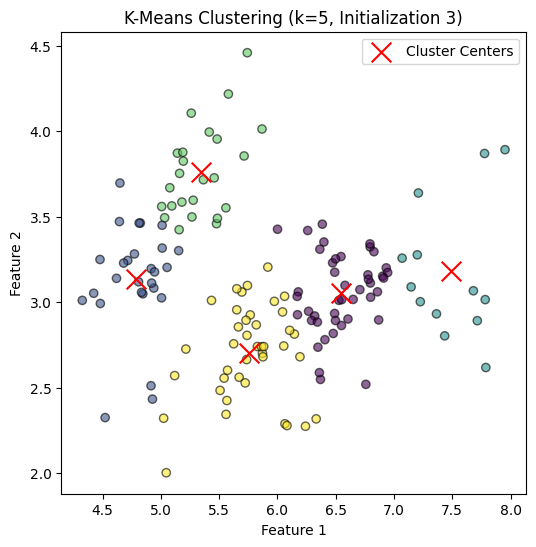

Initialization 4: Inertia = 21.31426068787648


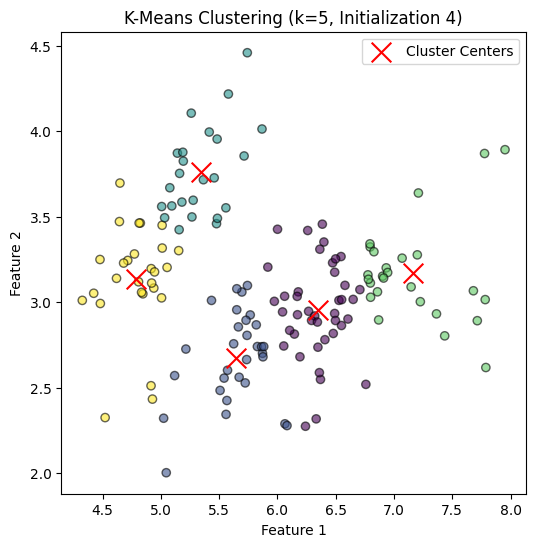

Initialization 5: Inertia = 20.954630196254037


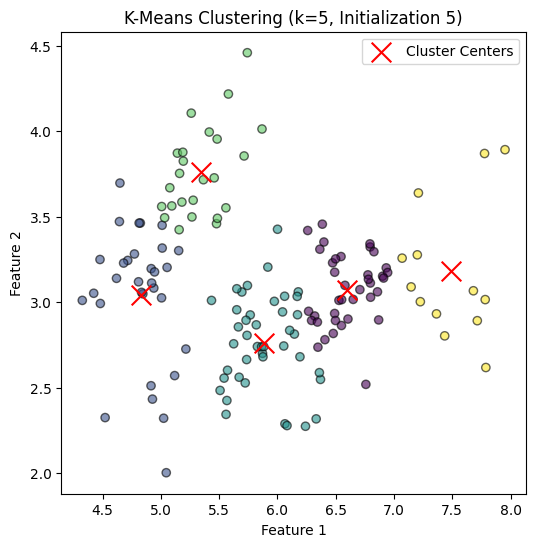

Best Inertia for k=5: 20.906080308386684



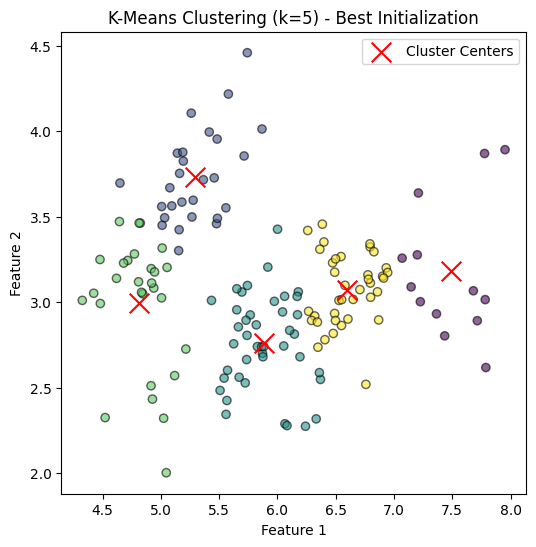


Results for K-Means with k=20:
Initialization 1: Inertia = 4.24731572882957


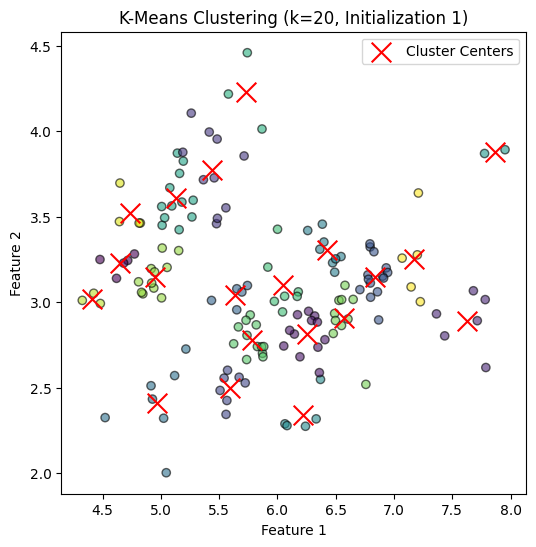

Initialization 2: Inertia = 4.634266207268261


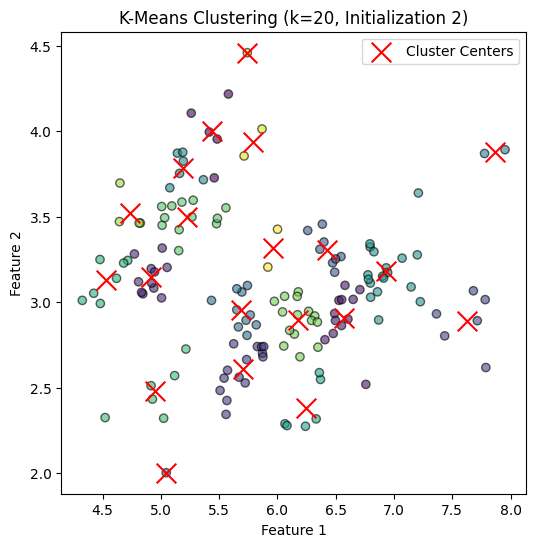

Initialization 3: Inertia = 4.2723834590651375


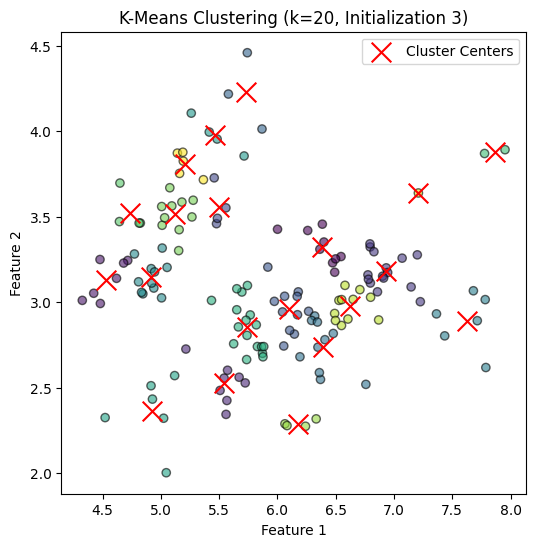

Initialization 4: Inertia = 4.407718277237947


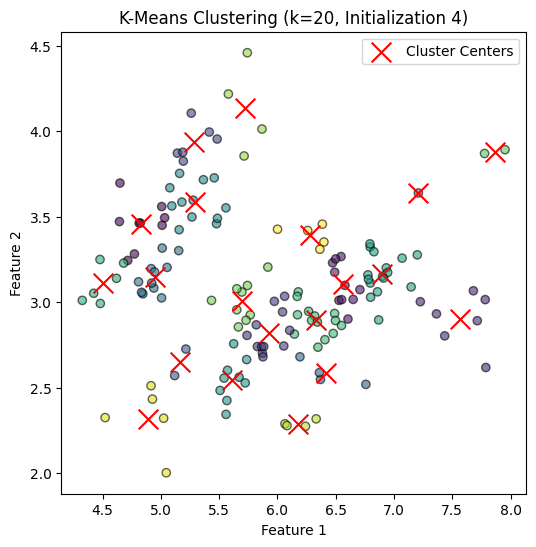

Initialization 5: Inertia = 4.676308253138268


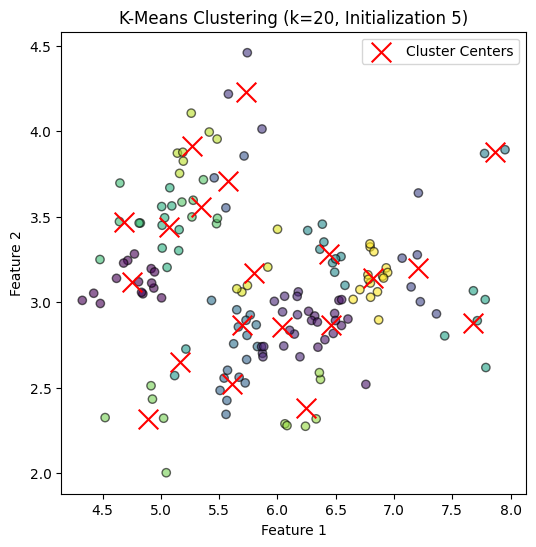

Best Inertia for k=20: 4.24731572882957



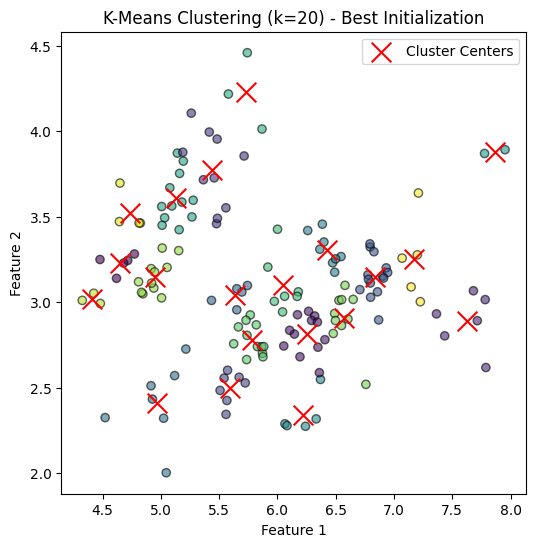

In [5]:
# Run K-Means clustering for k = 2, 5, 20 with multiple initializations and plot each initialization
k_values = [2, 5, 20]
num_initializations = 5

for k in k_values:
    best_inertia = float('inf')
    best_labels = None
    best_centers = None

    print(f"\nResults for K-Means with k={k}:")

    for i in range(num_initializations):
        kmeans = KMeans(n_clusters=k, n_init=1, random_state=None)
        labels = kmeans.fit_predict(iris_data)
        inertia = kmeans.inertia_

        print(f"Initialization {i+1}: Inertia = {inertia}")

        # Plot each initialization
        plt.figure(figsize=(6, 6))
        plt.scatter(iris_data[:, 0], iris_data[:, 1], c=labels, cmap='viridis', alpha=0.6, edgecolors='k')
        plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label="Cluster Centers")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.title(f"K-Means Clustering (k={k}, Initialization {i+1})")
        plt.legend()
        plt.show()

        # Keep track of the best initialization
        if inertia < best_inertia:
            best_inertia = inertia
            best_labels = labels
            best_centers = kmeans.cluster_centers_

    print(f"Best Inertia for k={k}: {best_inertia}\n")

    # Plot best clustering
    plt.figure(figsize=(6, 6))
    plt.scatter(iris_data[:, 0], iris_data[:, 1], c=best_labels, cmap='viridis', alpha=0.6, edgecolors='k')
    plt.scatter(best_centers[:, 0], best_centers[:, 1], c='red', marker='x', s=200, label="Cluster Centers")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(f"K-Means Clustering (k={k}) - Best Initialization")
    plt.legend()
    plt.show()



Agglomerative Clustering with single linkage:


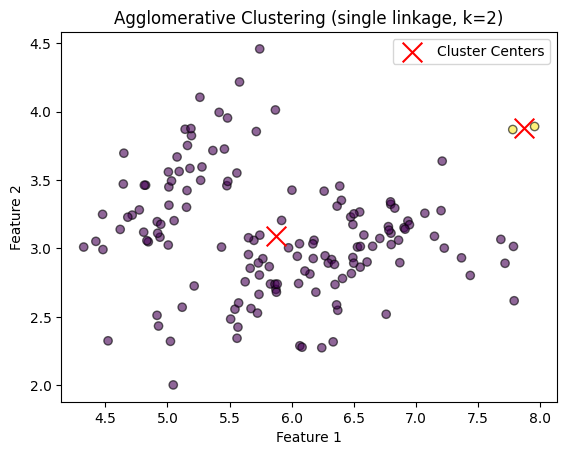

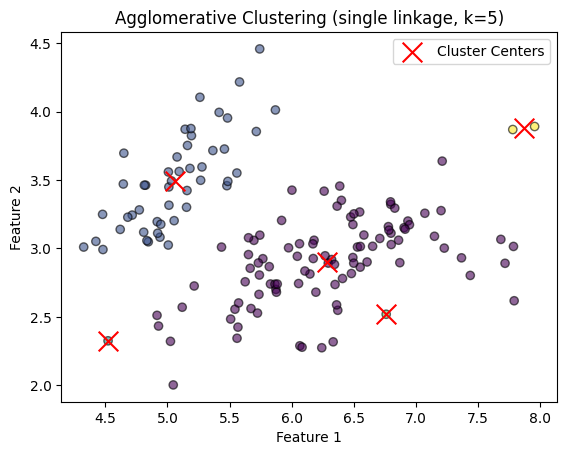

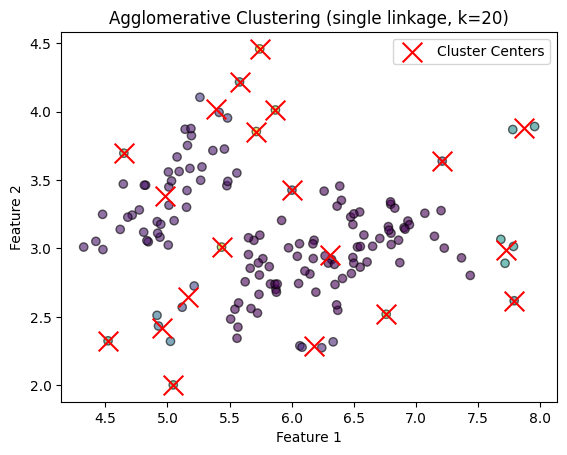


Agglomerative Clustering with complete linkage:


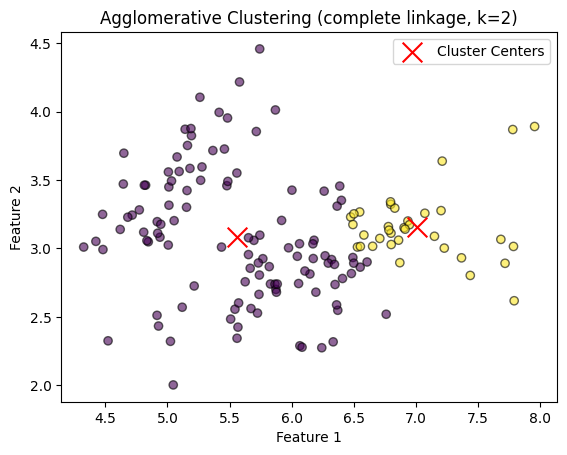

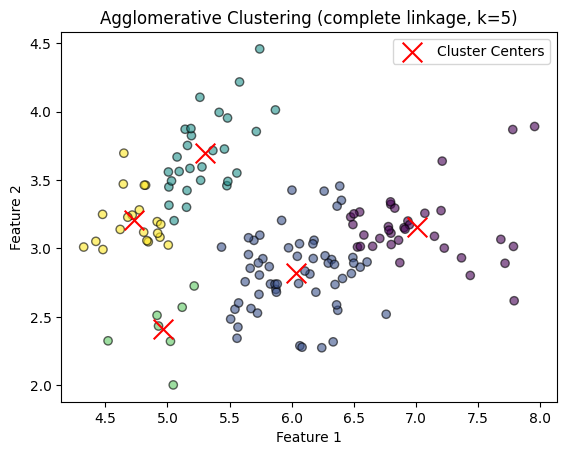

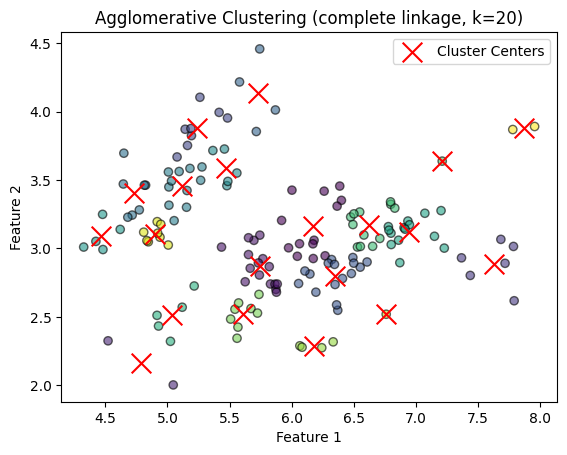

In [8]:
from sklearn.cluster import AgglomerativeClustering

linkage_methods = ['single', 'complete']

for linkage in linkage_methods:
    print(f"\nAgglomerative Clustering with {linkage} linkage:")

    for k in k_values:
        agglo = AgglomerativeClustering(n_clusters=k, linkage=linkage)
        labels = agglo.fit_predict(iris_data)


        cluster_centers = np.array([iris_data[labels == i].mean(axis=0) for i in range(k)])

        plt.scatter(iris_data[:, 0], iris_data[:, 1], c=labels, cmap='viridis', alpha=0.6, edgecolors='k')
        plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200, label="Cluster Centers")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.title(f"Agglomerative Clustering ({linkage} linkage, k={k})")
        plt.legend()
        plt.show()


Similarities:1.to divide data into different groups and uncover the hidden grouping structure in the data

difference:
K-Means: Assigns points based on distance from cluster centers.
Agglomerative Clustering: Starts with each data point as a separate cluster and continute to merges small clusters by distance.

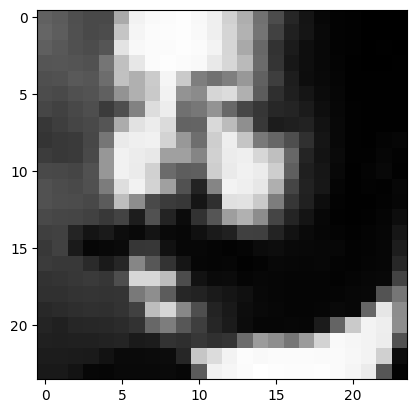

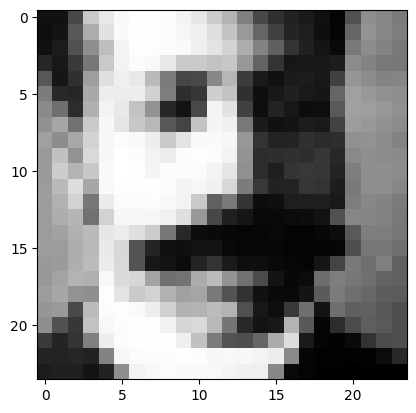

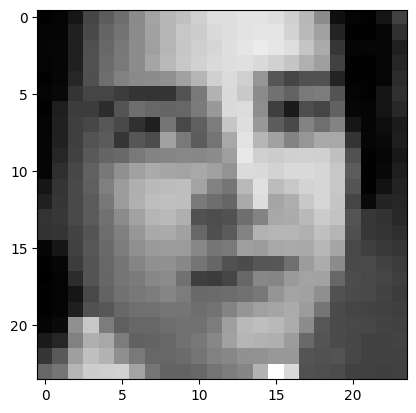

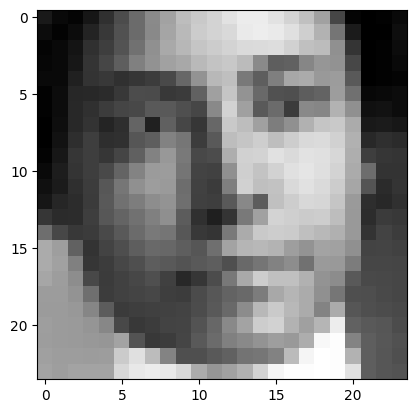

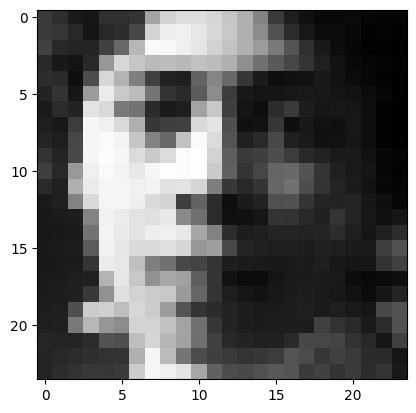

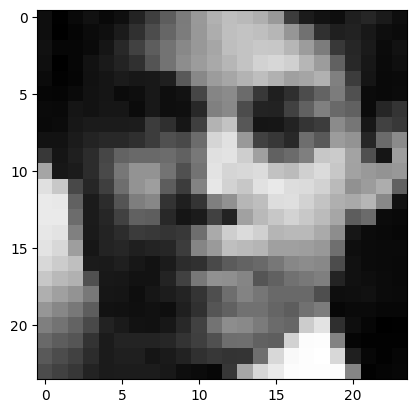

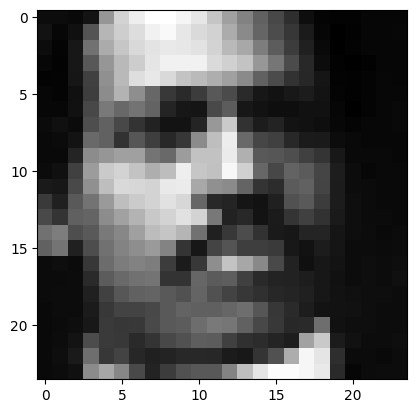

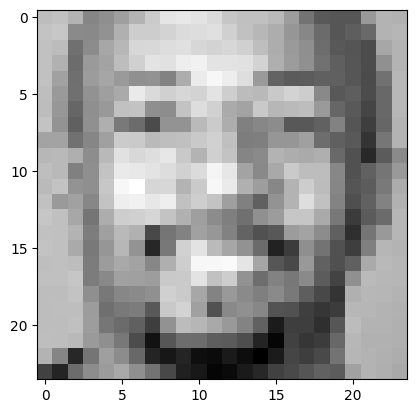

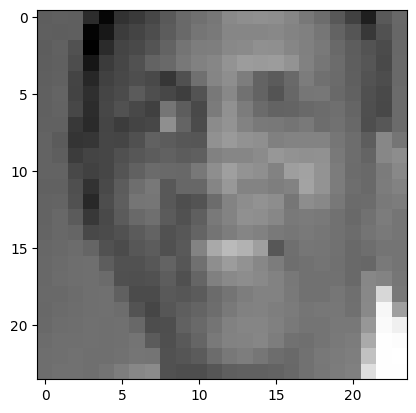

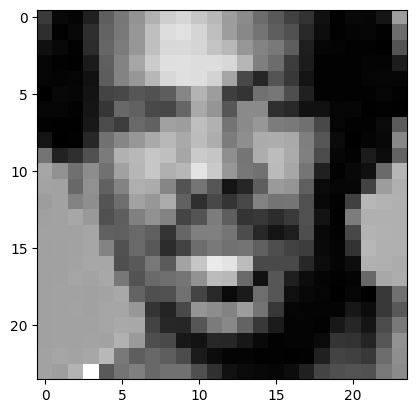

In [ ]:
X = np.genfromtxt("data/faces.txt", delimiter=None) # load face dataset
plt.figure()
# pick a data point i for display
for i in range(10):
  img = np.reshape(X[i,:],(24,24)) # convert vectorized data to 24x24 image patches
  plt.imshow( img.T , cmap="gray")
  plt.show()

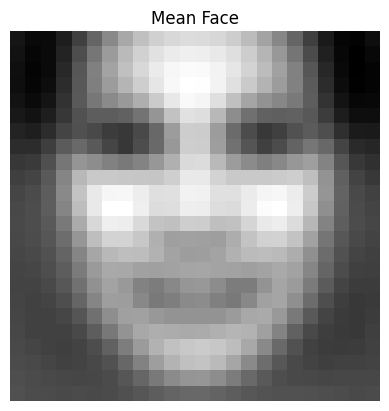

In [ ]:
from scipy.linalg import svd

# Compute mean face
mean_face = np.mean(X, axis=0)

# Zero-center the data
X0 = X - mean_face

# Display mean face
plt.imshow(np.reshape(mean_face, (24, 24)).T, cmap="gray")
plt.title("Mean Face")
plt.axis("off")
plt.show()

In [ ]:


U, S, Vh = svd(X0, full_matrices=False)

W = U @ np.diag(S)

print("Shape of W:", W.shape)  # (num_samples, 576)
print("Shape of Vh:", Vh.shape)  # (576, 576)


Shape of W: (4916, 576)
Shape of Vh: (576, 576)


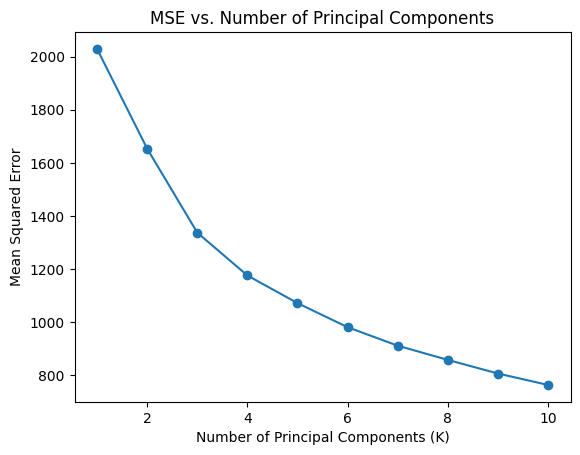

In [ ]:
mse_values = []
K_values = range(1, 11)

for K in K_values:
    X0_approx = W[:, :K] @ Vh[:K, :]
    mse = np.mean((X0 - X0_approx) ** 2)
    mse_values.append(mse)

# Plot MSE vs. K
plt.plot(K_values, mse_values, marker='o')
plt.xlabel("Number of Principal Components (K)")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs. Number of Principal Components")
plt.show()


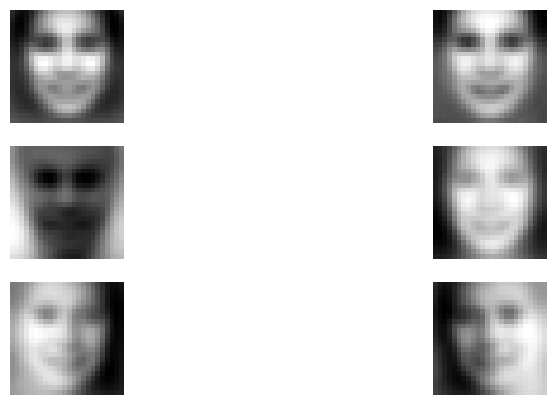

In [ ]:
alpha = 2 * np.median(np.abs(W[:, 0]))
plt.figure(figsize=(10, 5))
for j in range(3):
    for i, sign in enumerate([1, -1]):
        img = mean_face + sign * alpha * Vh[j, :]
        img = np.reshape(img, (24, 24))
        plt.subplot(3, 2, j * 2 + i + 1)
        plt.imshow(img.T, cmap="gray")
        plt.axis("off")
plt.show()


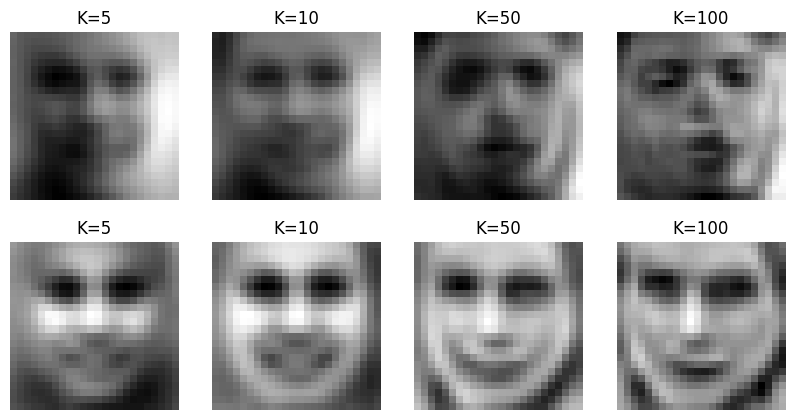

In [ ]:
chosen_faces = np.random.choice(X.shape[0], 2, replace=False)

K_values = [5, 10, 50, 100]
plt.figure(figsize=(10, 5))

for i, face_idx in enumerate(chosen_faces):
    original_face = X[face_idx, :]

    for j, K in enumerate(K_values):
        reconstructed_face = W[face_idx, :K] @ Vh[:K, :]
        reconstructed_face += mean_face  # Add mean back

        plt.subplot(2, len(K_values), i * len(K_values) + j + 1)
        plt.imshow(np.reshape(reconstructed_face, (24, 24)).T, cmap="gray")
        plt.axis("off")
        plt.title(f"K={K}")

plt.show()


In [ ]:
import mltools as ml
import mltools.transforms

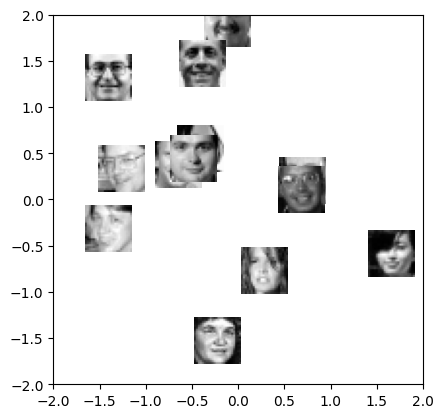

Min: [-3.30916536 -3.18182259]
Max: [3.10135525 3.82379395]


In [ ]:
idx = np.random.uniform(0, len(X), 15) # pick some data at random or otherwise; get list / vector of inte
idx = np.array(idx, dtype=int)
coord,params = ml.transforms.rescale( W[:,0:2] ) # normalize scale of "W" locations
for i in idx:
    loc = (coord[i, 0], coord[i, 0] + 0.5, coord[i, 1], coord[i, 1] + 0.5)    # the image & size
    img = np.reshape( X[i,:], (24,24) )
    plt.imshow( img.T , cmap="gray", extent=loc ) # draw each image
    plt.axis( (-2,2,-2,2) ) # set axis to reasonable visual scale
plt.show()
print("Min:", np.min(coord, axis=0))
print("Max:", np.max(coord, axis=0))

Statement of Collaboration:
https://pytorch.org/ for some function
https://pyimagesearch.com/2021/05/10/opencv-eigenfaces-for-face-recognition/